In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
import matplotlib.cm as cmx
from collections import OrderedDict
matplotlib.rc_file('matplotlibrc')
%pylab


import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.gridspec import GridSpec

OD = open('RawData/VIO-GROWTH.csv','r') 

def parse(file):
    results = []
    for i in range(0,6):
        results.append([])
        for j in range(0,8):
            results[i].append([])
    for line in file:
        l = line.strip().split(',')
        for i in range(0,48):
            results[i%6][int(i/6)].append(float(l[i])-0.084)
    return results
ODs = parse(OD)

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/guillaume/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [25]:
plt.clf()
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
gs = GridSpec(7, 2)
fig = plt.gcf()
fig.set_tight_layout({'pad':0})
fig.set_size_inches((3.75, 4.25))



ax0 = plt.subplot(gs[0, :])
#plt.axis('off')
ax1 = plt.subplot(gs[1:3, 0])
plt.axis('off')
ax2 = plt.subplot(gs[1:3, 1])
plt.axis('off')

(0.0, 1.0, 0.0, 1.0)

In [26]:
ax3 = plt.subplot(gs[3:5, 0])

VyieldAtc = [0.096,0.015,0.007,0.006,0.003,0.003,0.001,0.002,0.001,0.001]
atc = [100,10,3,1,0.3,0.1,0.03,0.01,0.003,0.0001] #ng/mL

n= VyieldAtc[0]
for i in range(0,len(VyieldAtc)):
    VyieldAtc[i] = (VyieldAtc[i])/n
ax3.plot(atc,VyieldAtc,'o',ms=3,mew=0.5,mec='#231f20', color = '#8E4E8E')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel('Violacein Yield (AU)')
ax3.set_xlabel('Atc concentration (ng/mL)')

ax3.set_ylim((0.0075, 1.2))
#ax3.set_yscale('log')

ax3.set_xlim((0.00004, 230))
ax3.set_xscale('log')

plt.xticks([100,10,1,0.1,0.01,0.0001],['100','10','1','0.1','0.01','0'], rotation = 0)

([<matplotlib.axis.XTick at 0x7feb80ee12e0>,
 [Text(0, 0, '100'),
  Text(0, 0, '10'),
  Text(0, 0, '1'),
  Text(0, 0, '0.1'),
  Text(0, 0, '0.01'),
  Text(0, 0, '0')])

In [27]:
ax4 = plt.subplot(gs[3:5, 1])
pcn = [507.96761816663025, 4.6542695044981315, 118.1787338492098, 69.37759064136263, 270,0.0,270,169.49119808218612]
time = np.arange(0,3*len(ODs[0][0]),3)

v=[ 0.023,0.008,0.014,0.01,0.13,0.0,0.015,0.074] # violacein yield - Abs 650nm
v2=[ 0.048,0.008,0.023,0.017,0.143,0.0,0.007,0.08] #Numbers 6 and 7 should be thrown out, both had construct
#v=[ 0.023,0.008,0.014,0.01,0.13,0.074] # violacein yield - Abs 650nm
#v2=[ 0.048,0.008,0.023,0.017,0.143,0.08] #Numbers 6 and 7 should be thrown out, both had construct
colors = ['#e82e52','#d32a5a','#bc2663','#a82272','#6c1f99','#3b2bd6','#2f2fea','#3347ff']

vmean,verr = [],[]
for i in range(0,len(v)):
    vmean.append(np.mean([v[i],v2[i]]))
    verr.append(np.std([v[i],v2[i]]))
a = max(vmean)
for i in range(0,len(vmean)):
    vmean[i] = vmean[i]/a  #normalizing to maximum value
    verr[i] = verr[i]/a
print(vmean)

a,b,c = [],[],[]
for i in [0,1,2,3,4,7]:
    a.append(vmean[i])
    b.append(pcn[i])
    c.append(verr[i])
a = array(a)[array(b).argsort(-1)]
b = array(b)[array(b).argsort(-1)]
    
for i in range(len(b)):
    ax4.errorbar(b[i],a[i],yerr=c[i],fmt='o',ms=3,mew=0.5,mec='#231f20', color=colors[i],capsize=2)
ax4.plot(b, a, color='#8E4E8E', lw=0.25, dashes=(2,4))
ax4.set_xscale('log')
plt.xticks([5, 50, 100, 300, 500], [5, 50, 100, 300, 500])
#ax.set_yscale('log')
ax4.set_ylabel('Violacein Yield (AU)')
ax4.set_xlabel('Plasmid Copy Number')


axin4 = ax4.inset_axes([0.225, 0.6, 0.4, 0.35])

GRarr = np.zeros((6,8,len(ODs[0][0])))


#pcn = [507.96761816663025, 4.6542695044981315, 118.1787338492098, 69.37759064136263,270,169.49119808218612]
a = []
for i in range(0,6):
    for j in [0,1,2,3,4,7]:
        for k in range(1,len(ODs[i][j])-1):
            GRarr[i][j][k] = (((ODs[i][j][k+1]- ODs[i][j][k]))+(ODs[i][j][k] - ODs[i][j][k-1]))/2 #Central Difference to calculate growth rate
growthRate = np.zeros((6,8))
flu = np.zeros((6,8))

    
tlag = np.zeros((6,8))
tmax = np.zeros((6,8))
for i in range(0,6,1):
    for j in [0,1,2,3,4,7]:
        for k in range(0,400):
            if GRarr[i][j][k] >= max(GRarr[i][j][k+1:]) and GRarr[i][j][k] >= max(GRarr[i][j][:k]):
                tmax[i][j] = k #Find time of maximum growth rate for each well
                break
for i in range(0,6,1):
    for j in [0,1,2,3,4,7]:
        for k in range(0,400):
            if ODs[i][j][k] >= 0.03:
                tlag[i][j] = k
                break

for i in range(0,6,1):
    for j in [0,1,2,3,4,7]:
        f = int(tmax[i][j])
        growthRate[i][j] = np.mean(GRarr[i][j][f-3:f+3]) #Average growth rate over small window around maximum                    
y = []
t = []
dt = []
pp = []
for i in [0,1,2,3,4,7]:
    y.append(vmean[i])
    t.append(np.mean(np.transpose(tlag)[i])*3)
    dt.append(np.std(np.transpose(tlag)[i])*3)
    pp.append(pcn[i])
    
y = array(y)[array(pp).argsort(-1)]
t = array(t)[array(pp).argsort(-1)]
dt = array(dt)[array(pp).argsort(-1)]
    
for i in range(len(y)):    
    axin4.errorbar(y[i],t[i],yerr=dt[i],fmt='o',ms=3,mew=0.5,mec='#231f20', color = colors[i],capsize=2)
    a.append(np.mean(np.transpose(growthRate)[i]))#Divide GR by GR of 0 atc condition, this looks better if plotted against aTc concentration

#axin4.set_xscale('log')
#axin4.set_yscale('log')

axin4.set_xlabel('Viol. Yield', fontsize=5, labelpad=1)
axin4.set_ylabel('Lag Time (mins)', fontsize=5, labelpad=1)
#axin4.set_xticks([0, 60, 120])
#axin4.set_yticks([0, 1])
axin4.tick_params(labelsize=5)

[0.2600732600732601, 0.05860805860805861, 0.13553113553113552, 0.09890109890109891, 1.0, 0.0, 0.08058608058608058, 0.5641025641025641]


In [28]:
ax = plt.subplot(gs[5:, 0])


VioYield = [0.117,0.180,0.089,0.092,0.098,0.088,0.118,0.134,0.119,0.083,0.087,0.165,0.106,0.093,0.098] #,0.143] # Last is best from first try
vioYieldSingle = [0.035500000000000004, 0.008, 0.0185, 0.013500000000000002, 0.1365, 0.0, 0.011, 0.077]
PlasmidYield = [94.0,83.0,54.4,83.0,67.8,49.4,78.6,74.4,74.0,46.8,49.8,65.2,67.2,10.3,37.0]
VioYieldNorm = []
q = 0
p = []
l = [(0.137-0.082)*4]
for i in VioYield:
    VioYieldNorm.append((i-0.082)*4) #Blank and Path Length Correction
    p.append(q)
    q+=1
for i in range(0,len(vioYieldSingle)):
    vioYieldSingle[i] = (vioYieldSingle[i]/2)*4 #Path Length correction, blank subtracted in previous NB + used double the volume of cells in these measurements

ax.bar(p,sorted(VioYieldNorm)[::-1],edgecolor='#231f20', color='#80537e',label = '2 Plasmid')
ax.bar(np.arange(16,24),sorted(vioYieldSingle)[::-1],edgecolor='#231f20', color='#bd79ba', label = 'Single Plasmid')
ax.set_ylabel('Abs 650nm')
ax.legend()
plt.yticks([0,0.1,0.2,0.3,0.4])
ax.set_xlabel('Rank')
plt.xticks(np.arange(0,24),[1,'','','',5,'','','','',10,'','','','',15,'',1,'','','',5,'','',''])

#fig.savefig('vioAssay.svg')

([<matplotlib.axis.XTick at 0x7feb80f50340>,
 [Text(0, 0, '1'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '5'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '10'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '15'),
  Text(0, 0, ''),
  Text(0, 0, '1'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '5'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [29]:
def parse(file):
    results = []
    for i in range(0,4):
        results.append([])
        for j in range(0,15):
            results[i].append([])
    k = 0
    for line in file:
        if k == 0:
            q = line.strip().split(',')
            k +=1
        l = line.strip().split(',')
        for i in range(0,60):
            results[i%4][int(i/4)].append(float(l[i])-0.12)
    return results
OD = open('VioGR-2.csv','r') 
ODs = parse(OD)

In [30]:
time = np.arange(0,len(ODs[0][0])/20,1/20)
#fig,ax = plt.subplots(figsize=(4,3))
key = np.zeros(15)
#VioYield = [0.117,0.180,0.089,0.092,0.098,0.088,0.118,0.134,0.119,0.083,0.087,0.165,0.106,0.093]#],0.098] #,0.143] # Last is best from first try
for i in range(0,len(VioYield)):
    for j in range(0,len(sorted(VioYield))):
        if VioYield[i] == sorted(VioYield)[j]:
            key[i] = int(j)
print(key)
colors  = ["#6eecfa","#5ce2fa","#4bd9f9","#3bcff8","#30c4f7","#2bbaf5","#2eaff1","#38a4ed","#4498e7","#518cdf","#5d80d6","#6873cc","#7266c0","#7b59b2","#824aa3","#873b93"]
#n=1
finalOD = np.zeros((15))
for i in range(0,4,4):
    for j in range(0,15):
        k = len(ODs[i][j])-1
   #     a = np.zeros(len(ODs[i][j]))
   #     b = np.zeros(len(ODs[i][j]))
  #      for k in range(0,len(ODs[i][j])):
  #          a[k] = np.mean([ODs[i][j][k],ODs[i+1][j][k],ODs[i+2][j][k],ODs[i+3][j][k]])#,ODs[i+4][j][k],ODs[i+5][j][k]])
            #b[k] = np.std([ODs[i][j][k],ODs[i+1][j][k],ODs[i+2][j][k],ODs[i+3][j][k]])#,ODs[i+4][j][k],ODs[i+5][j][k]])
 #       ax.errorbar(time,a,yerr=b,fmt='o',color=colors[int(key[j])],capsize=1)
        finalOD[j] = np.mean([ODs[i][j][k],ODs[i+1][j][k],ODs[i+2][j][k],ODs[i+3][j][k]])
#ax.legend()
#ax.set_xlabel('Time (h)', fontsize = 8)
#ax.set_ylabel('Optical Density', fontsize=8)
#ax.set_yscale('log')
#ax.set_xscale('log')
#ax.set_xlim([0,200])
#ax.set_ylim([0,0.4])
#fig.savefig('vio-curves.svg')
print(finalOD)

[ 9. 14.  3.  4.  7.  2. 10. 12. 11.  0.  1. 13.  8.  5.  7.]
[0.78975 0.52025 0.7175  0.73325 0.775   0.7705  0.63425 0.7535  0.71575
 0.8205  1.0535  1.10075 0.67025 0.7245  0.49375]


In [31]:
GRarr = np.zeros((4,15,len(ODs[0][0])))
a = []
for i in range(0,4):
    for j in range(0,15):
        for k in range(1,len(ODs[i][j])-1):
            GRarr[i][j][k] = (((ODs[i][j][k+1]- ODs[i][j][k]))+(ODs[i][j][k] - ODs[i][j][k-1]))/2 #Central Difference to calculate growth rate

tlag = np.zeros((4,15))
tmax = np.zeros((4,15))
for i in range(0,4,1):
    for j in range(0,15):
        for k in range(0,225):
            if GRarr[i][j][k] >= max(GRarr[i][j][k+1:225]) and GRarr[i][j][k] >= max(GRarr[i][j][:k]):
                tmax[i][j] = k #Find time of maximum growth rate for each well
                break
for i in range(0,4,1):
    for j in range(0,15):
        for k in range(0,400):
            if ODs[i][j][k] >= 0.05:
                tlag[i][j] = k
                break
growthRate = np.zeros((4,15))
flu = np.zeros((4,15))
for i in range(0,4,1):
    for j in range(0,15):
        f = int(tmax[i][j])
        growthRate[i][j] = np.mean(GRarr[i][j][f-2:f+2]) #Average growth rate over small window around maximum
print(growthRate)
grMeans = np.zeros(15)
for i in range(0,4):
    for j in range(0,15):
        grMeans[j] = 1.0/np.mean([1/growthRate[0][j],1/growthRate[1][j],1/growthRate[2][j],1/growthRate[3][j]]) #Taking the harmonic mean of the growth rates
singleplasmidGRs = [0.0023333333333333344,0.002666666666666663,0.002062499999999997,0.002812499999999999,0.0033125000000000025,0.003666666666666669]
# Pasted from a separate nb, calculatured in the same way as above

[[ 0.01525   0.041375  0.0115    0.013125  0.0155    0.0405    0.01275
   0.015375  0.07775   0.0035    0.042375  0.062     0.025375  0.003125
   0.01575 ]
 [ 0.010875  0.01      0.011875  0.010125  0.0295   -0.004125  0.012875
   0.009125  0.06975   0.012875  0.041375  0.042625  0.0125    0.005375
   0.018125]
 [ 0.024875  0.02575   0.009625  0.01      0.017875  0.058     0.013
   0.01125   0.036875  0.0115    0.128125  0.056875  0.017125  0.002625
   0.017625]
 [ 0.016     0.0255    0.01075   0.011     0.06025   0.02475   0.00575
   0.002875  0.033125  0.013125  0.059625  0.013375  0.020625  0.00675
   0.019   ]]


In [32]:
ax = plt.subplot(gs[5:, 1])

maxOD = np.zeros((4,15))
maxAv = np.zeros(15)
for i in range(0,4):
    for j in range(0,15):
        maxOD[i][j] = ODs[i][j][len(ODs[i][j])-1]*4.0
t = np.transpose(maxOD)
for i in range(0,15):
    maxAv[i] = np.mean(t[i])
q = []
for i in [0,1,2,3,4,7]:
    q.append(vioYieldSingle[i])

ax.plot(q,singleplasmidGRs,'o',ms=3,marker='s', mew=0.5,mec='#231f20',color='#bd79ba', label = "Single Plasmid")
ax.plot(VioYieldNorm,grMeans,'o',ms=3,marker='o', mew=0.5,mec='#231f20',color='#80537e',label="Two Plasmid")

ax.legend(fontsize=5, borderpad=0.2)
ax.set_ylim([0,0.05])
ax.set_ylabel('Growth Rate (1/min)')
ax.set_xlabel('Violacein Yield')
#fig.savefig('vio-gr-fig5e.svg')

Text(0.5, 0, 'Violacein Yield')

In [33]:
plt.tight_layout()
fig = plt.gcf()
fig.set_tight_layout({'pad':2})
fig.set_size_inches((3.825, 5.5))
plt.savefig('Fig5-New.pdf')
plt.savefig('Fig5-New.svg')

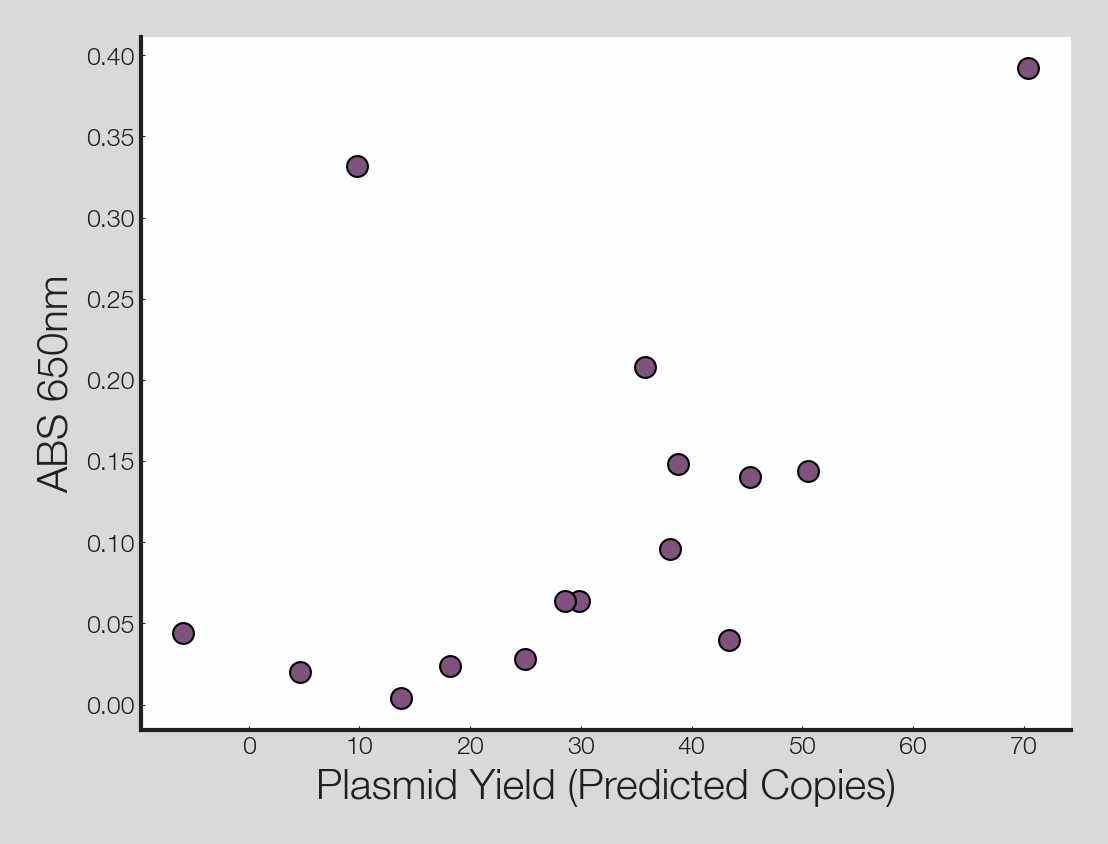

In [5]:
##Sequencing the promoters failed for many constructs, Here I plot the Violacein Yield plasmid yield/Final OD(A very good estimate of PCN) 
## This would be an estimate of the Total plasmid concentration. A 
normPlasmidYield = np.zeros(15)
for i in range(0,len(PlasmidYield)):
    normPlasmidYield[i] = PlasmidYield[i]/(finalOD[i]*2)- (180*1.5*finalOD[i]*2)/30.0 ##Using Final OD from plate reader experiments since I noticed significant differences in the numbers of cells when isolating plasmids
    ###Subtracting out the predicted yield of the fixed copy p15A plasmid (assuming 30 copies/cell)
## One point is negative, but this simple calculation shows a very reasonable relationship between
## PCN and Violacein Yield, I don't think it's "good enough" to put in the main text though

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
ax.plot(normPlasmidYield,VioYieldNorm,'o',ms=5,mew=0.5,mec='black',color='#80537e')
ax.set_ylabel('ABS 650nm', fontsize=10)
ax.set_xlabel('Plasmid Yield (Predicted Copies)', fontsize=10)
fig.savefig('PlasmidYieldvsVio.svg')

In [6]:
GRarr = np.zeros((4,15,len(ODs[0][0])))
a = []
for i in range(0,4):
    for j in range(0,15):
        for k in range(1,len(ODs[i][j])-1):
            GRarr[i][j][k] = (((ODs[i][j][k+1]- ODs[i][j][k]))+(ODs[i][j][k] - ODs[i][j][k-1]))/2 #Central Difference to calculate growth rate

tlag = np.zeros((4,15))
tmax = np.zeros((4,15))
for i in range(0,4,1):
    for j in range(0,15):
        for k in range(0,225):
            if GRarr[i][j][k] >= max(GRarr[i][j][k+1:225]) and GRarr[i][j][k] >= max(GRarr[i][j][:k]):
                tmax[i][j] = k #Find time of maximum growth rate for each well
                break
for i in range(0,4,1):
    for j in range(0,15):
        for k in range(0,400):
            if ODs[i][j][k] >= 0.05:
                tlag[i][j] = k
                break
growthRate = np.zeros((4,15))
flu = np.zeros((4,15))
for i in range(0,4,1):
    for j in range(0,15):
        f = int(tmax[i][j])
        growthRate[i][j] = np.mean(GRarr[i][j][f-2:f+2]) #Average growth rate over small window around maximum
print(growthRate)
grMeans = np.zeros(15)
for i in range(0,4):
    for j in range(0,15):
        grMeans[j] = 1.0/np.mean([1/growthRate[0][j],1/growthRate[1][j],1/growthRate[2][j],1/growthRate[3][j]]) #Taking the harmonic mean of the growth rates
singleplasmidGRs = [0.0023333333333333344,0.002666666666666663,0.002062499999999997,0.002812499999999999,0.0033125000000000025,0.003666666666666669]
# Pasted from a separate nb, calculatured in the same way as above

[[ 0.01525   0.041375  0.0115    0.013125  0.0155    0.0405    0.01275
   0.015375  0.07775   0.0035    0.042375  0.062     0.025375  0.003125
   0.01575 ]
 [ 0.010875  0.01      0.011875  0.010125  0.0295   -0.004125  0.012875
   0.009125  0.06975   0.012875  0.041375  0.042625  0.0125    0.005375
   0.018125]
 [ 0.024875  0.02575   0.009625  0.01      0.017875  0.058     0.013
   0.01125   0.036875  0.0115    0.128125  0.056875  0.017125  0.002625
   0.017625]
 [ 0.016     0.0255    0.01075   0.011     0.06025   0.02475   0.00575
   0.002875  0.033125  0.013125  0.059625  0.013375  0.020625  0.00675
   0.019   ]]


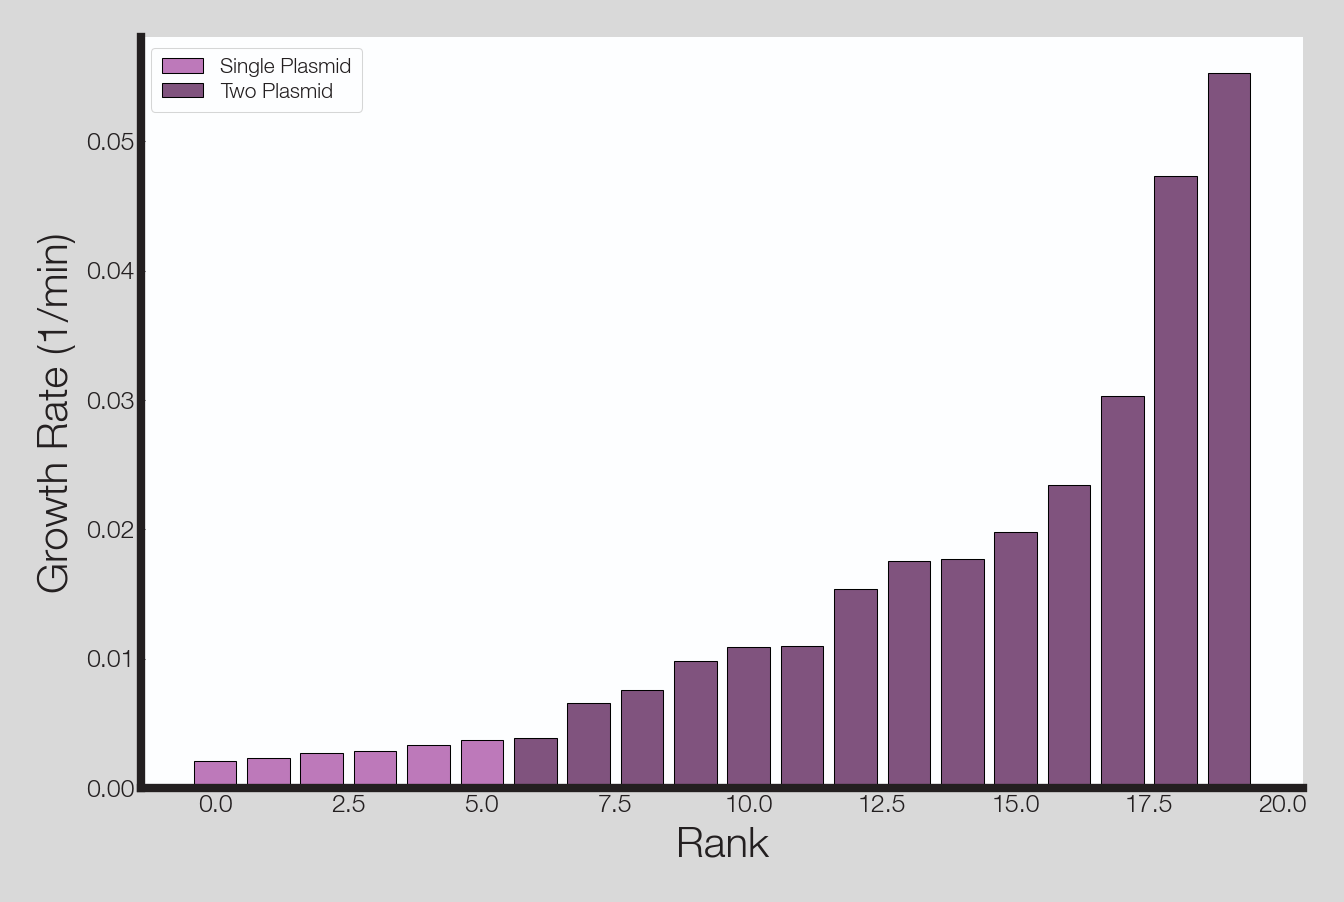

In [7]:
fig,ax = plt.subplots()
ax.bar([0,1,2,3,4,5],sorted(singleplasmidGRs),color='#bd79ba',edgecolor='black',label = "Single Plasmid")
ax.bar(np.arange(6,6+len(grMeans)-1),sorted(grMeans)[1:], color='#80537e',edgecolor='black', label = "Two Plasmid")
ax.set_ylabel('Growth Rate (1/min)',fontsize=10)
ax.set_xlabel('Rank',fontsize=10)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)
ax.legend()

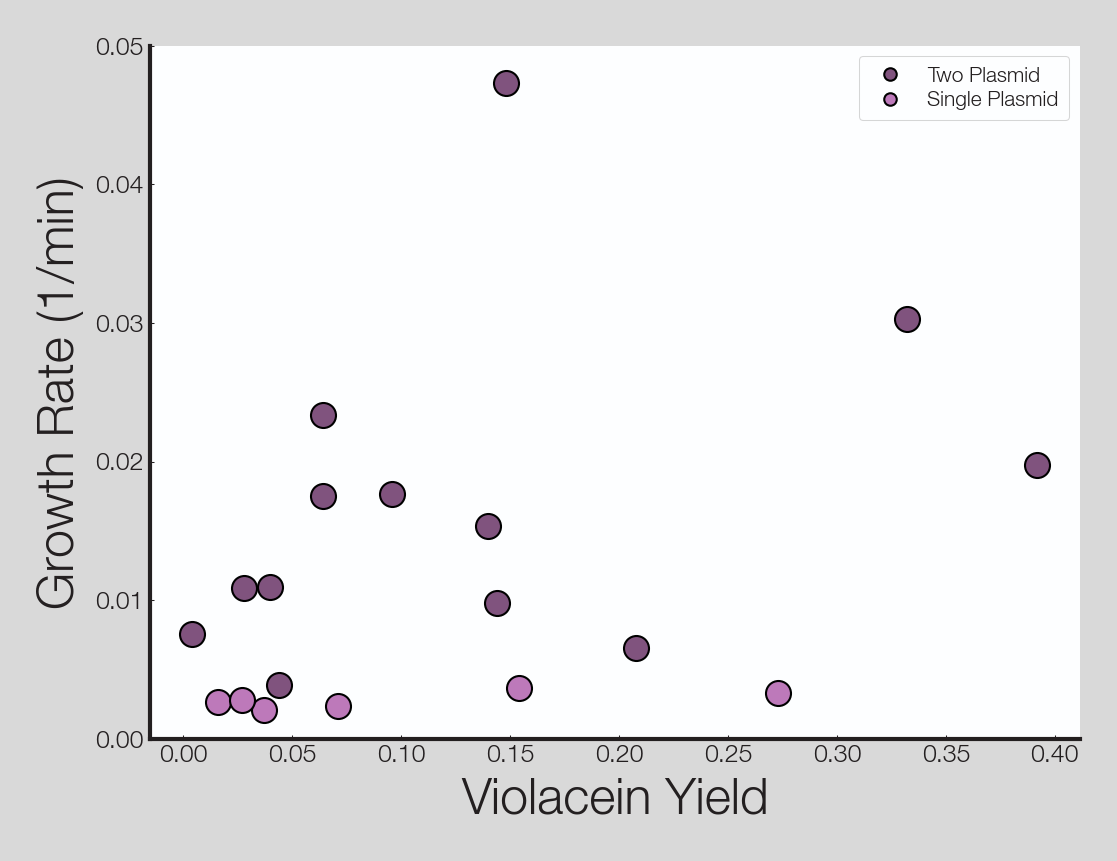

Text(0.5, 0, 'Plasmid Yield')

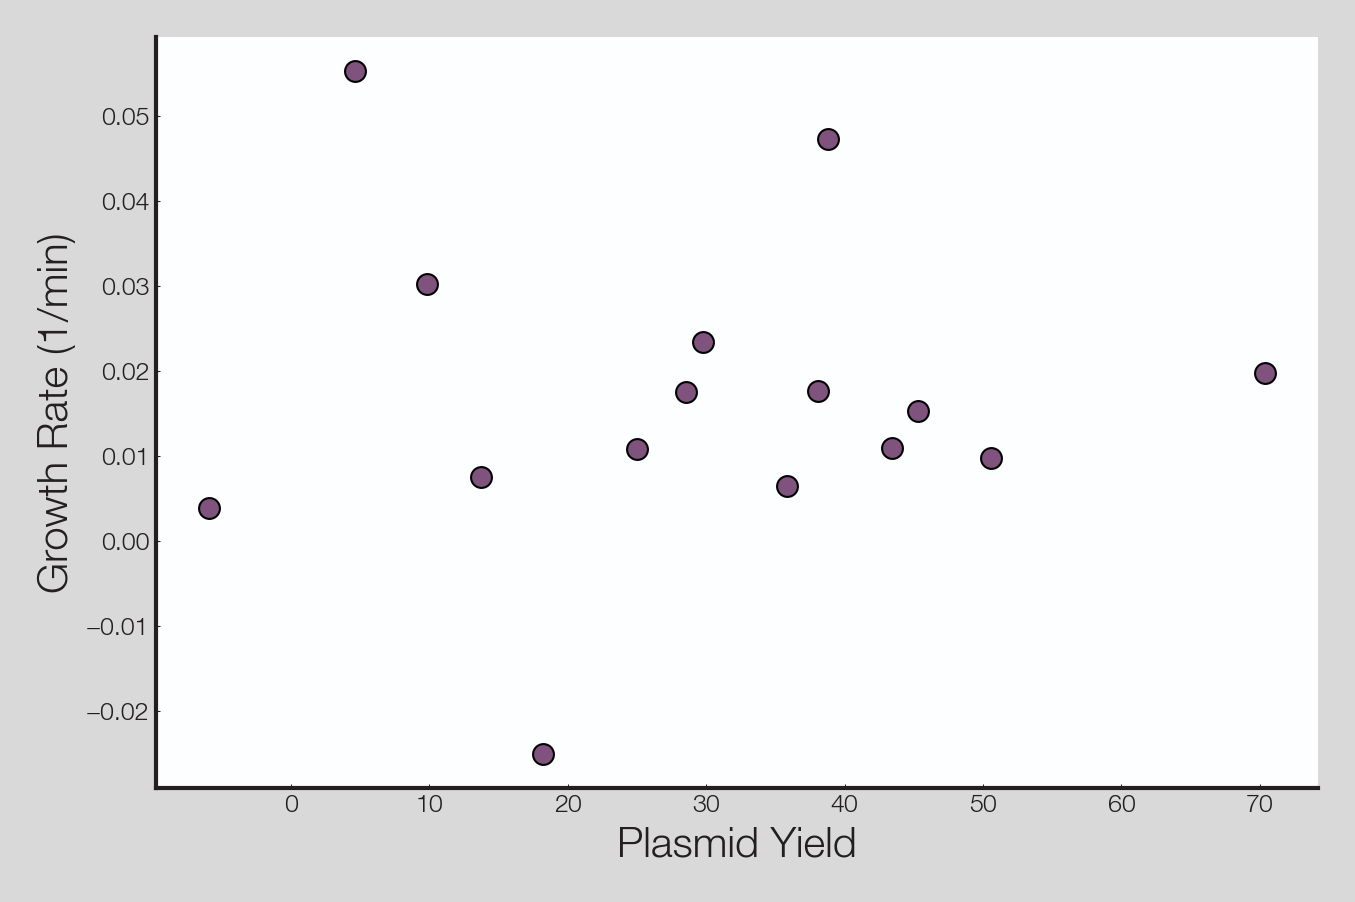

In [9]:
fig,ax =plt.subplots()
ax.plot(normPlasmidYield,grMeans,'o',ms=5,mew=0.5,mec='black',color='#80537e',label="Two Plasmid")
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1)
ax.set_ylabel('Growth Rate (1/min)',fontsize=10)
ax.set_xlabel('Plasmid Yield',fontsize=10)

In [ ]:
#from scipy.optimize import curve_fit
#t = np.arange(0,len(ODs[0][0])/20,1/20)
#def func(t,g,t0,N):
#    return N*np.exp(-np.exp(t0-g*t))
#params = np.zeros((4,15))
#params2 = np.zeros((4,15))
#for i in range(0,4):
#    for j in range(0,15):
#        a = curve_fit(func,t,ODs[i][j])[0]
##        params[i][j] = a[0]
 #       params2[i][j] = a[2]
#print(params)
#pmean = np.zeros(15)
#psd = np.zeros(15)
#pmean2 = np.zeros(15)
#for i in range(0,15):
#    pmean[i] = np.mean(np.transpose(params)[i])
#    psd[i] = np.std(np.transpose(params)[i])
#print(pmean)
#fig,ax = plt.subplots(figsize=(4,3))
###ax.set_xlim([0,0.05])
#ax.errorbar(pmean,VioYieldNorm,xerr=psd,fmt='o',ms=3,mew=0.4,mec= 'black',color='#80537e')
#ax.set_ylabel('Abs 650nm',fontsize=8)
#ax.set_xlabel('Growth Rate',fontsize=8)
#ax.set_xlim([0.3,1.0])
#print(0.03*60)